In [1]:
#Importing the required libraries

import os
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from nsetools import Nse
from nsepy import get_history

import seaborn as sns
import plotly.express as px

from datetime import datetime, timedelta, date

#### 1. Loading Data
The list of stocks of different indices have be taken from 'nseindia.com'  
The data for 'P/E Ratio' is taken from 'valueresearchonline.com'

In [2]:
#Loading from excels
Bluechip = pd.read_excel('Data\\NIFTY50_PE_Ratio_19_Sept_2019.xlsx')
Midcap= pd.read_excel('Data\\Midcap100_PE_Ratio_19_Sept_2019.xlsx')
Smallcap = pd.read_excel('Data\\SmallCap100_PE_Ratio_19_Sept_2019.xlsx')

In [3]:
#Creating a new column identifying the stock type 
Bluechip['Category'] = "Bluechip"
Midcap['Category'] = 'Midcap'
Smallcap['Category'] = 'Smallcap'

### Stock Selection Strategy

###### 2. Selecting stocks with PE values ranging between 4-15 from different sectors. 

In [4]:
#Selecting stocks based on their index numbers
Bluechip_stocks = Bluechip[['Company', 'Symbol', 'Price', 'PE', 'Category']].iloc[[41, 24, 33, 18]]
Midcap_stocks = Midcap[['Company', 'Symbol', 'Price', 'PE', 'Category']].iloc[[42, 57, 25, 30]]
Smallcap_stocks = Smallcap[['Company', 'Symbol', 'Price', 'PE', 'Category']].iloc[[29, 7, 96, 19]]

In [5]:
#Merging all the 3 dataframes into 1
portfolio_stocks_list = pd.merge(Bluechip_stocks, Midcap_stocks, how = 'outer')
portfolio_stocks_list = pd.merge(portfolio_stocks_list, Smallcap_stocks, how = 'outer')
print(portfolio_stocks_list.shape)

(12, 5)


In [6]:
#Final list of stock for portfolio
portfolio_stocks_list 

Company      Symbol    Price     PE  Category
0                     Tata Steel Ltd.   TATASTEEL   352.05   4.80  Bluechip
1              Indian Oil Corpn. Ltd.  IBULHSGFIN   126.95   8.63  Bluechip
2   National Thermal Power Corp. Ltd.        NTPC   121.00  10.29  Bluechip
3                  Hero Motocorp Ltd.  HEROMOTOCO  2578.45  13.78  Bluechip
4          Hexaware Technologies Ltd.    HEXAWARE   383.95  19.36    Midcap
5            LIC Housing Finance Ltd.   LICHSGFIN   386.00   7.95    Midcap
6   Edelweiss Financial Services Ltd.   EDELWEISS   105.15  11.49    Midcap
7                   Federal Bank Ltd.  FEDERALBNK    83.90  12.31    Midcap
8       Future Lifestyle Fashion Ltd.        FLFL     2.76   4.87  Smallcap
9       Bombay Dyeing & Mfg. Co. Ltd.   BAJAJELEC    -3.37   8.30  Smallcap
10                VIP Industries Ltd.     VENKEYS    -2.91  10.03  Smallcap
11                     Cyient Limited      CYIENT    -2.82   1.86  Smallcap

1. The final list of stocks have been selected manually 4 from each cap category with a diverse P/E ratio
2. One from each sector
3. All stocks have low P/E value ranging from 1.8 to 20 to see how the weight allocation change among them

#### 3. Downloading data for the Selected stocks in 'portfolio_stocks_list'
1. The data is downloaded using the 'NSE' python library. 

In [7]:
#nse = Nse()
#Data Download
start = date(2016,6,6)
end = date(2019,7,2)

portfolio_data = []
for i in portfolio_stocks_list.Symbol.values:
    portfolio_data.append(get_history(i, start = start, end = end))
    portfolio_stocks_data = pd.concat(portfolio_data)
    

In [8]:
print(portfolio_stocks_data.shape)
portfolio_stocks_data.head()

(9132, 14)


Symbol Series  Prev Close    Open    High     Low    Last  \
Date                                                                       
2016-06-06  TATASTEEL     EQ      338.55  335.00  340.70  332.15  338.60   
2016-06-07  TATASTEEL     EQ      337.85  339.55  343.85  337.05  343.55   
2016-06-08  TATASTEEL     EQ      342.60  343.25  346.45  338.50  341.50   
2016-06-09  TATASTEEL     EQ      341.50  340.00  346.70  340.00  344.00   
2016-06-10  TATASTEEL     EQ      342.05  342.00  344.50  333.50  333.70   

             Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                            
2016-06-06  337.85  336.99  4969784  1.674766e+14   59409             1114540   
2016-06-07  342.60  341.09  3898620  1.329786e+14   42571              608785   
2016-06-08  341.50  342.17  4466650  1.528362e+14   43354              769901   
2016-06-09  342.05  343.59  5935910  2.039511e+14   60789             1950837   
2016-06-10  334.40  338.99  5506426  1.866617e+14   48464             1461802   

            %Deliverble  
Date                     
2016-06-06       0.2243  
2016-06-07       0.1562  
2016-06-08       0.1724  
2016-06-09       0.3287  
2016-06-10       0.2655

In [9]:
#Verifying whether all the selected stocks have data for the specified period
portfolio_stocks_data['Symbol'].value_counts()

EDELWEISS     761
HEROMOTOCO    761
FEDERALBNK    761
FLFL          761
HEXAWARE      761
CYIENT        761
NTPC          761
IBULHSGFIN    761
VENKEYS       761
LICHSGFIN     761
BAJAJELEC     761
TATASTEEL     761
Name: Symbol, dtype: int64

In [10]:
#Subsetting the required fields
portfolio_stocks_df = portfolio_stocks_data[['Symbol', 'Prev Close']]

In [11]:
#Renaming column to avoid spaces in the column header
portfolio_stocks_df.rename({'Prev Close' : 'Prev_close'},inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [12]:
#Using pivot to create stocks as columns

portfolio_stocks_df = portfolio_stocks_df.pivot(columns= 'Symbol', index= portfolio_stocks_data.index)

#Setting the columns

portfolio_stocks_df.columns = [col[1] for col in portfolio_stocks_df.columns]

#Filling 'NaN' if any

portfolio_stocks_df.fillna(0, inplace = True)

In [13]:
portfolio_stocks_df.head()

BAJAJELEC  CYIENT  EDELWEISS  FEDERALBNK    FLFL  HEROMOTOCO  \
Date                                                                       
2016-06-06     222.05  478.95      72.40       51.00  107.50     3146.20   
2016-06-07     220.10  473.15      70.45       53.60  112.20     3113.25   
2016-06-08     218.65  486.85      76.80       56.65  113.55     3129.70   
2016-06-09     225.60  495.50      79.00       57.95  113.60     3170.10   
2016-06-10     228.95  500.00      77.60       58.35  112.15     3086.70   

            HEXAWARE  IBULHSGFIN  LICHSGFIN    NTPC  TATASTEEL  VENKEYS  
Date                                                                     
2016-06-06    213.90      751.35     476.00  147.60     338.55   383.50  
2016-06-07    215.00      744.75     467.15  147.10     337.85   381.75  
2016-06-08    214.35      737.85     474.45  148.45     342.60   383.75  
2016-06-09    215.35      740.60     480.20  148.15     341.50   388.10  
2016-06-10    214.50      736.85     475.60  151.05     342.05   387.95

Now that we have clean data for 12 stocks from 3 different categories let's see the price movement for each stock

## 3. Data Exploration

###### 3.1 Plotting the prices of the stocks

In [14]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Text(0, 0.5, 'Price in INR')

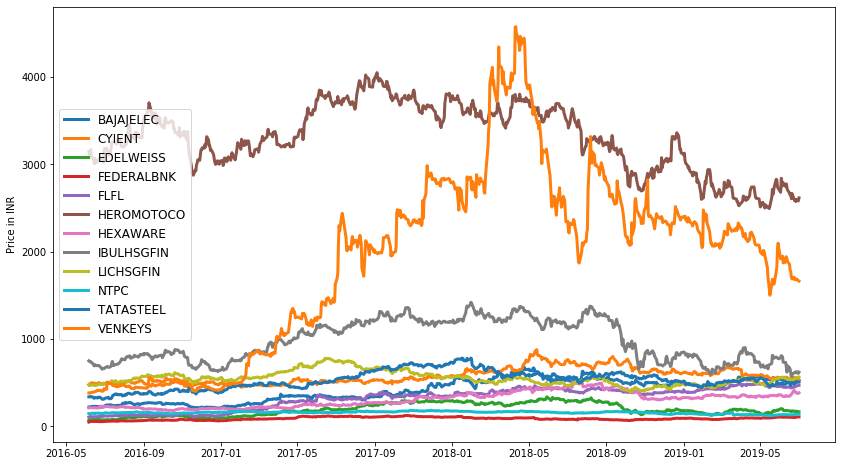

In [15]:
plt.figure(figsize= (14, 8))

for c in portfolio_stocks_df.columns:
           plt.plot(portfolio_stocks_df.index, portfolio_stocks_df[c],  label = c, lw = 3)
plt.legend(loc = 'best', fontsize = 12)
plt.ylabel('Price in INR')

It looks like HeroMotoCo and Venkeys have a relatively high which makes to difficult to understand the trend of other stocks. 


##### 3.2. To understand better about the volatility of the stocks we will be plotting them using the daily returns / percentage change

In [16]:
#Calculating the percentage change for each stock
returns = portfolio_stocks_df.pct_change().dropna()


In [17]:
#Creating returns for each category to analyse the volatility easily
returns_bluechip = returns[['TATASTEEL', 'IBULHSGFIN', 'NTPC', 'HEROMOTOCO' ]]
returns_midcap = returns[['HEXAWARE', 'LICHSGFIN', 'EDELWEISS', 'FEDERALBNK' ]]
returns_smallcap = returns[['FLFL', 'BAJAJELEC', 'VENKEYS', 'CYIENT' ]]


Text(0.5, 1.0, 'Smallcap Stocks Returns Anaysis')

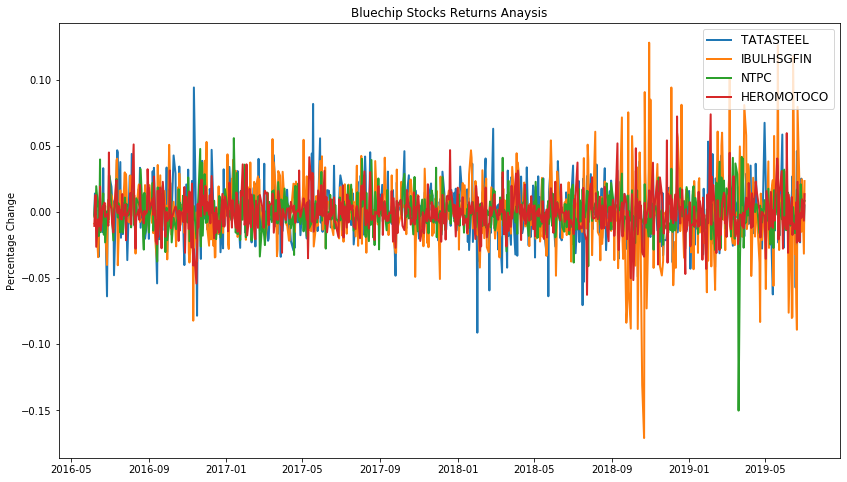

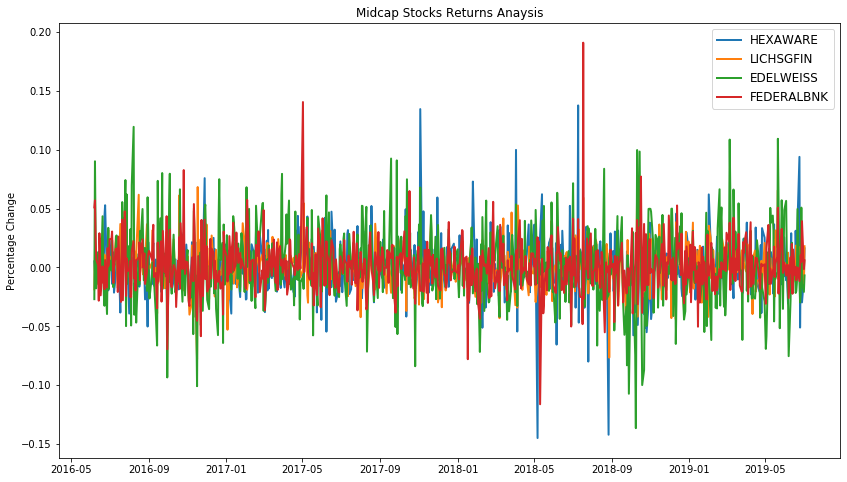

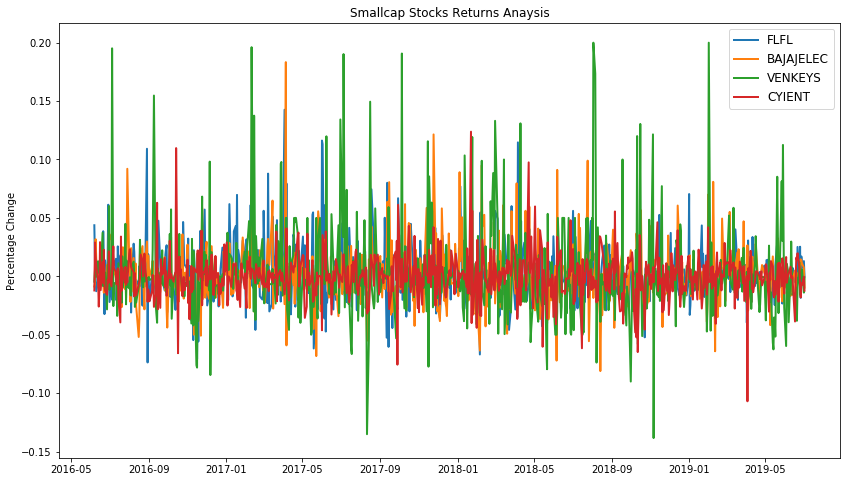

In [18]:
#1. Plotting Bluechip Companies returns
plt.figure(figsize = (14, 8))
for c in returns_bluechip.columns.values:
    plt.plot(returns_bluechip.index, returns_bluechip[c], lw = 2, label = c)
plt.legend(loc = 'upper right', fontsize = 12)
plt.ylabel('Percentage Change')
plt.title('Bluechip Stocks Returns Anaysis')


#2. Plotting Midcap Companies returns
plt.figure(figsize = (14, 8))
for c in returns_midcap.columns.values:
    plt.plot(returns_midcap.index, returns_midcap[c], lw = 2, label = c)
plt.legend(loc = 'upper right', fontsize = 12)
plt.ylabel('Percentage Change')
plt.title('Midcap Stocks Returns Anaysis')

#3. Plotting Smallcap Companies returns
plt.figure(figsize = (14, 8))
for c in returns_smallcap.columns.values:
    plt.plot(returns_smallcap.index, returns_smallcap[c], lw = 2, label = c)
plt.legend(loc = 'upper right', fontsize = 12)
plt.ylabel('Percentage Change')
plt.title('Smallcap Stocks Returns Anaysis')


From the above three graphs we can clearly see that Blue chip stocks have low standard deviation whereas the standard devialtion increases for Midcap and higher for Small cal stocks. 
So, at this point we can assume that if we make a high risk - high return portfolio the weights allocation could be higher for small cap stocks. 


## 4. Model Building

### 4.1. Monte Carlo Simulation

1. My basic approach to building a Portfolio Optimization is based on the Modern Portfolio Theory by Harry Markowitz 
which states that if an investor is willing to take higher risk then it needs to be compensated with high return. If a 
portfolio gives same return for a given risk then the investor will choose the one with low risk. 
2. Porfolio performance is calculated using Sharpe Ratio.
    (Expected Returns - Risk free rate) / Portfolio standard deviation
3. Efficient Frontier gives us the marks the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return.

###### 4.1.1. Calculating 
1. Annual returns
2. Annual volatility / risk
3. Creating a covariance matrix to calculate portfolio volatility / risk


In [19]:
#Returns is calculated by percentage change of each stock
returns = portfolio_stocks_df.pct_change().dropna()
mean_returns = returns.mean()

In [20]:
mean_returns

BAJAJELEC     0.001418
CYIENT        0.000323
EDELWEISS     0.001608
FEDERALBNK    0.001229
FLFL          0.002219
HEROMOTOCO   -0.000128
HEXAWARE      0.001023
IBULHSGFIN    0.000121
LICHSGFIN     0.000385
NTPC          0.000059
TATASTEEL     0.000736
VENKEYS       0.002620
dtype: float64

In [21]:
#Creating the covariance matrix of returns
cov_matrix = returns.cov() 

###### 4.1.2  Portfolio Perfomance
To assess a portfolio's performance I'll be using the basic Sharpe Ratio.  
Sharpe Ratio can be calculated using the formula:  
(Expected return - Risk free rate) / Portfolio standard deviation  

###### The 'annual_portfolio_performance' function is calculating the return and risk for a given weights, mean_returns and covariance matrix.

In [22]:
def annual_portfolio_performance(weights, mean_returns, cov_matrix):
    annual_returns = np.sum(mean_returns * weights) * 250
    annual_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(250)
    
    return annual_returns, annual_risk

###### The function 'random_portfolios' 'is  
1. Generating a random set of weights for given number of portfolios and assets
2. Calculating the portfolio standard deviation (risk),  return and Sharpe ratio for a given set of weights

In [23]:
def random_portfolios(num_assets, num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    #creating a 3d array with length specied in 'num_portfolios'
    results = np.zeros((3,num_portfolios))
    #Generate random weights and create a list of all the random generated weights
    weights_record = []
    #For 'n' number of portfolios we are generating random weights
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        #'weights_record' is the list of weights for a given number of portfolios and assets
        weights_record.append(weights)
        #Using the above created 'annual_portfolio_perfomance' function we generate portfolio standard deviation and returns
        portfolio_return, portfolio_std_dev = annual_portfolio_performance(weights, mean_returns, cov_matrix)
        # So for every set of weights we are calculating the risk, return and sharpe ration and saving it in results. 
        results[0,i] = portfolio_return
        results[1,i] = portfolio_std_dev
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [24]:
#Defining the required values for the function 'random_portfolios' input
num_assets = portfolio_stocks_df.shape[1]
num_portfolios = 25000
# The risk free rate is taken from the govt bond annual return rate. 
risk_free_rate = 0.069

Using the function 'random_portfolios'  now we have 1000 randomly generated weights for 4 assets and their respective returns, portolio standard deviation (risk) and Sharpe ratio. 


##### 1.3 Visualising the results of Maximum Sharpe Ratio and min volatility / risk
1. Getting weight, portfolio returns, risk and Sharpe Ratio using the above 'random_portfolio' function
2. Creating a dataframe of weights whose Sharpe ratio is highest
3. Creating a dataframe of weights with low volatility / risk
4. Printing all the results of Sharpe ratio and miminum risk returns
5. Visualizing the returns, risk and sharpe ratio

In [25]:
def efficient_frontier_random_portfolios(num_assets, num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    #Step 1
    final_results, final_weights = random_portfolios(num_assets, num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    #Step 2
    #Taking the maximum values of 'results[2]' which is the sharpe ratio
    max_sharpe_indexId = np.argmax(final_results[2])
    #Getting the returns and risk for max sharpe ratio
    portfolio_return, portfolio_volatility = final_results[0, max_sharpe_indexId], final_results[1, max_sharpe_indexId]
    #Creating  a dataframe of the final weights of max sharpe ratio
    max_sharpe_allocation = pd.DataFrame(final_weights[max_sharpe_indexId], index = portfolio_stocks_df.columns, columns = ['Weights_Allocation'])
    #Rounding the values to 2 digits
    max_sharpe_allocation.Weights_Allocation = [round(i*100, 2) for i in max_sharpe_allocation.Weights_Allocation]
    #Transposing Stock names from index to columns
    max_sharpe_allocation = max_sharpe_allocation.T
    
    #Step 3
    min_vol_indexId = np.argmin(final_results[1])
    portfolio_min_return, portfolio_min_volatility = final_results[0, min_vol_indexId], final_results[1, min_vol_indexId]
    min_vol_allocation = pd.DataFrame(final_weights[min_vol_indexId], index = portfolio_stocks_df.columns, columns = ['Allocation'])
    min_vol_allocation.Allocation = [round(i*100, 2) for i in min_vol_allocation.Allocation]
    min_vol_allocation = min_vol_allocation.T
    
    #Step 4
    print("_" * 125)
    print("Maximum Sharpe Allocation \n")
    print("Annual Portfolio Return", round(portfolio_return, 4))
    print("Annual Risk / Volatility", round(portfolio_volatility, 4))
    print("Maximum Sharpe Ratio", final_results[2, max_sharpe_indexId])
    print("\n")
    print(max_sharpe_allocation)
    
    print("_" * 125)
    print("Minimum Volatility Annual Portfolio Return")
    print("Annual Return", round(portfolio_min_return, 2))
    print("Annual Risk / Volatility", round(portfolio_min_volatility, 2))
    print("Sharpe Ratio", final_results[2, min_vol_indexId])

    print("\n")
    print(min_vol_allocation)
    
    #Step 5 - Visualization
    plt.figure(figsize=(20, 12))
    plt.scatter(final_results[1, :], final_results[0, :], c = final_results[2, :], cmap = 'YlGnBu', s = 10, alpha = 3)
    plt.colorbar()
    plt.scatter(portfolio_volatility, portfolio_return, marker = '*', color = 'r',  s = 500, label = 'Maximum Sharpe Ratio')
    plt.scatter(portfolio_min_volatility, portfolio_min_return, marker = '*', color = 'g', s = 500, label = 'Minimum Volatility')
    plt.title("Simulation of Portfolio Optimization based on Efficient Frontier")
    plt.xlabel("Annualised Volatility / Risk")
    plt.ylabel("Annualised Returns")
    plt.legend()
    

_____________________________________________________________________________________________________________________________
Maximum Sharpe Allocation 

Annual Portfolio Return 0.3907
Annual Risk / Volatility 0.2293
Maximum Sharpe Ratio 1.4026900311214034


                    BAJAJELEC  CYIENT  EDELWEISS  FEDERALBNK   FLFL  \
Weights_Allocation       7.67   10.49       9.91        3.04  25.68   

                    HEROMOTOCO  HEXAWARE  IBULHSGFIN  LICHSGFIN  NTPC  \
Weights_Allocation        8.21      5.23        1.24        1.2  0.01   

                    TATASTEEL  VENKEYS  
Weights_Allocation       5.91    21.41  
_____________________________________________________________________________________________________________________________
Minimum Volatility Annual Portfolio Return
Annual Return 0.11
Annual Risk / Volatility 0.15
Sharpe Ratio 0.3048992453139967


            BAJAJELEC  CYIENT  EDELWEISS  FEDERALBNK  FLFL  HEROMOTOCO  \
Allocation       6.54   16.58       2.01   

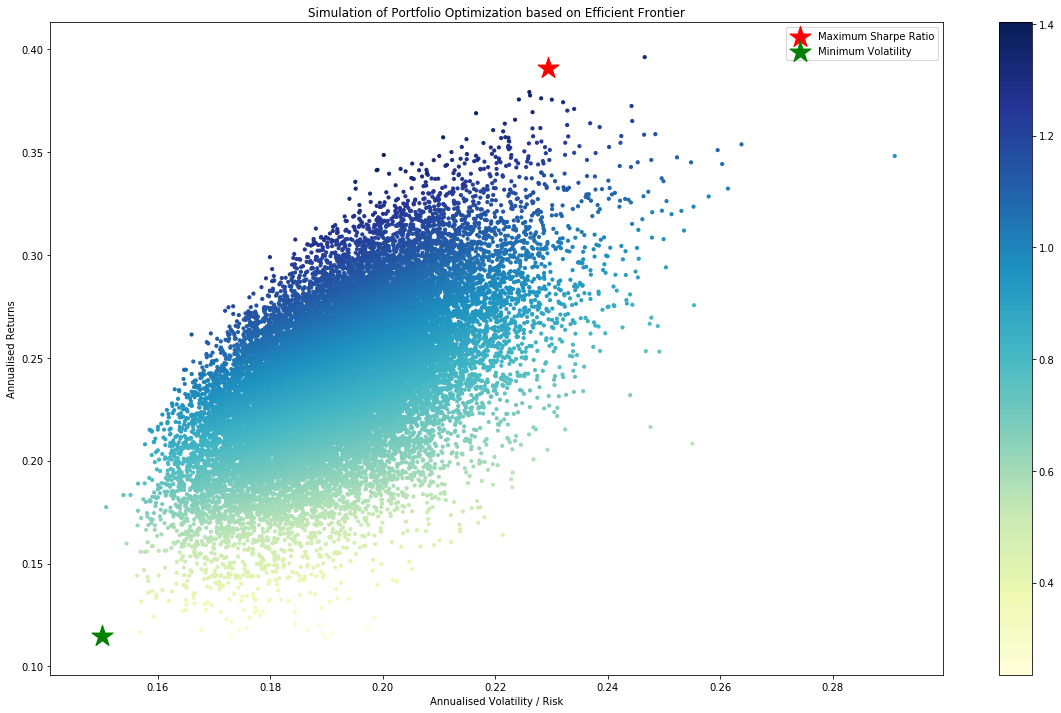

In [26]:
efficient_frontier_random_portfolios(num_assets, num_portfolios, mean_returns, cov_matrix, risk_free_rate)

1. It appears that for both strategies the risk seems to be very high and close. 15 in low risk vs 23 in high risk. 
2. As expected since Maruti is very stable high weight allocation was given to it especially for a high risk investment strategy. The second highest weight allocation as given to TCS as it is the next most stable stock except for that one negative spike. 
4. Although, ITC and ONGC had high negative spikes they were given very low weights. It could be maybe because of the low trading price when compared to the other two. 
3. Even though for a low risk strategy the allocation from Maruti was reduced considerable it appears that the risk hasn't reduced much. 


### 4.2. Using 'PYOPT' library for Linear Optimization

In [27]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

This library uses the sharpe ratio as the objective function and optimises the weights as per the investment strategy

In [28]:
# Calculate expected returns and sample covariance

mu = expected_returns.mean_historical_return(portfolio_stocks_df) #Mean Returns
S = risk_models.sample_cov(portfolio_stocks_df) # Annualised covariance matrix 


##### 4.2.1  Strategy 1  -> High RIsk - High Return (Max Sharpe Ratio)

In [29]:

# Calculate expected returns and sample covariance

Mean_returns = expected_returns.mean_historical_return(portfolio_stocks_df) #Mean Returns
Cov_matrix = risk_models.sample_cov(portfolio_stocks_df) # Annualised covariance matrix 

# Optimise for maximal Sharpe ratio
#The range for weights is given between '0' and '1' so that we don't have any negative allocation. 
ef = EfficientFrontier(Mean_returns, Cov_matrix, weight_bounds=(0,1))
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

{'BAJAJELEC': 0.1642, 'CYIENT': 0.0, 'EDELWEISS': 0.03833, 'FEDERALBNK': 0.11158, 'FLFL': 0.40099, 'HEROMOTOCO': 0.0, 'HEXAWARE': 0.13891, 'IBULHSGFIN': 0.0, 'LICHSGFIN': 0.0, 'NTPC': 0.0, 'TATASTEEL': 0.0, 'VENKEYS': 0.14598}
Expected annual return: 46.5%
Annual volatility: 23.9%
Sharpe Ratio: 1.86


(0.46512399624371403, 0.2393847942677122, 1.8594497516242265)

##### Creating a dataframe for the Max Sharpe Ratio weights

In [30]:
cleaned_weights_MS= pd.DataFrame(list(cleaned_weights.items()), columns= ['Symbol',  'OPT_Max_Sharpe_Weight'])

#Rounding the weights
cleaned_weights_MS['OPT_Max_Sharpe_Weight'] = np.round(cleaned_weights_MS['OPT_Max_Sharpe_Weight'] * 100, 2)

#Merging with main dataframe for other stock details
cleaned_weights_MS = pd.merge(cleaned_weights_MS, portfolio_stocks_list, how = 'left')

#And finally sorting with "Category" column for better visualization analysis
cleaned_weights_MS = cleaned_weights_MS.sort_values('Category')


#### 4.2.2. Strategy 2  -> Low Risk - Low Return

In [31]:
# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S, weight_bounds=(0,1))
# The input for finding requried low risk are Expected risk and Risk Free Rate
# Here I've given the acceptable risk to 8% and risk free rate '6.9%'
raw_weights = ef.efficient_risk(0.08, 0.069)
cleaned_weights_low_risk = ef.clean_weights()
print(cleaned_weights_low_risk)
ef.portfolio_performance(verbose=True)

{'BAJAJELEC': 0.06232, 'CYIENT': 0.17348, 'EDELWEISS': 0.0, 'FEDERALBNK': 0.0334, 'FLFL': 0.07175, 'HEROMOTOCO': 0.21858, 'HEXAWARE': 0.08108, 'IBULHSGFIN': 0.0, 'LICHSGFIN': 0.04696, 'NTPC': 0.25909, 'TATASTEEL': 0.05334, 'VENKEYS': 0.0}
Expected annual return: 11.9%
Annual volatility: 14.4%
Sharpe Ratio: 0.69


(0.1190061631296632, 0.14389539547400818, 0.6880426076423458)

In [32]:
cleaned_weights_low_risk= pd.DataFrame(list(cleaned_weights_low_risk.items()), columns= ['Symbol',  'OPT_Low_Risk_Weight'])

#Rounding the weights
cleaned_weights_low_risk['OPT_Low_Risk_Weight'] = np.round(cleaned_weights_low_risk['OPT_Low_Risk_Weight'] * 100, 2)

#Merging with main dataframe for other stock details
cleaned_weights_low_risk = pd.merge(cleaned_weights_low_risk, portfolio_stocks_list, how = 'left')

#And finally sorting with "Category" column for better visualization analysis
cleaned_weights_low_risk  = cleaned_weights_low_risk.sort_values('Category')

##### 4.2.3. Visualizing the weights for Strategies

In [33]:
fig1 = px.bar(cleaned_weights_MS, x = 'Symbol', y = 'OPT_Max_Sharpe_Weight', 
             color= 'Category', 
             title = 'High Risk - High Return Strategy (Max Sharpe Ratio)', 
             labels = {'Symbol': 'Stock', 'OPT_Max_Sharpe_Weight': 'Max Sharpe Weight'})
fig1.show()

fig2 = px.bar(cleaned_weights_low_risk, x = 'Symbol', y = 'OPT_Low_Risk_Weight', 
             color= 'Category', 
             title = 'Low Risk Strategy', 
             labels = {'Symbol': 'Stock', 'OPT_Low_Risk_Weight': 'Low Risk Weight'})
fig2.show()

1. As seen from the visualisations earlier on the volatility of the stocks we assumed that for high risk more weight could be given to high volatile stocks. 
2. Clearly for high risk strategy the algorithm has given '0' weight for Bluechip stocks and moderate weights for midcap and high weight for small cap stocks. 
3. Similarly for a low risk strategy more than 50% weightage is given to Bluechip stocks. 